In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/MCTS`


In [2]:
using BSON: @save, @load
using RecursiveArrayTools

In [3]:
using Revise

In [4]:
using MCTS

[ Info: Precompiling MCTS [6562b248-24c9-44fd-b362-05588c9be571]


In [ ]:
MCTS.ab_sanity()

In [5]:
using Plots

In [7]:
MCTS.runner()

1.0

In [7]:
times, win_avgs = MCTS.bench_AB()

([0.0002111384298323036, 0.0012523910163644409, 0.006635031259425489, 0.03063298331134209, 0.14617443185181897, 0.2968287242103874], [1.894736842105263, 1.9, 1.9, 1.8421052631578947, 1.75])

In [7]:
@load "bench_AB.bson" times win_avgs

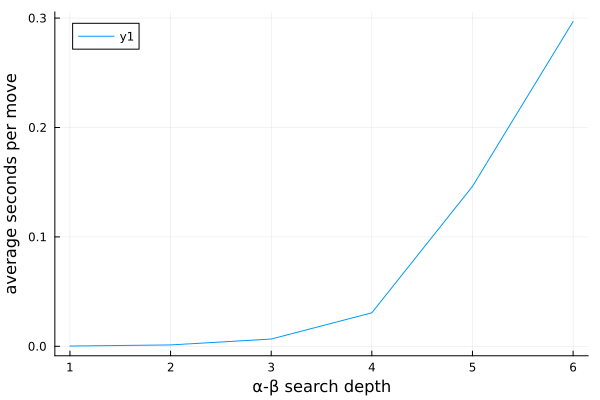

In [13]:
plot(1:6, times)
xlabel!("α-β search depth")
ylabel!("average seconds per move")

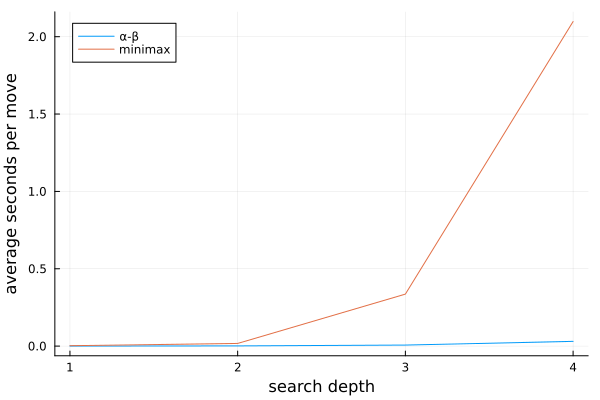

In [21]:
plot(1:4, [times[1:4] minimax_times], label=["α-β" "minimax"])
xlabel!("search depth")
ylabel!("average seconds per move")

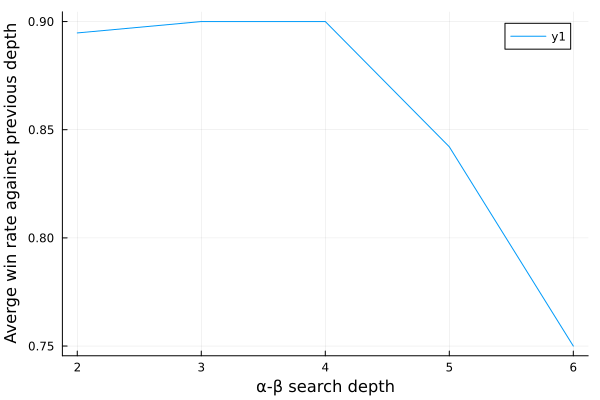

In [17]:
plot(2:6, win_avgs .- 1)
xlabel!("α-β search depth")
ylabel!("Averge win rate against previous depth")

In [8]:
minimax_times = MCTS.bench_minimax()

5-element Vector{Float64}:
 0.00013887646762589923
 0.002743654353846154
 0.06537058052777779
 0.6928202599111108
 6.4969442213913045

In [8]:
minimax_times = MCTS.bench_minimax()

4-element Vector{Float64}:
 0.002538102647058823
 0.017170041243902437
 0.3360785886216216
 2.0980217400937504

In [9]:
@save "bench_minimax.bson" minimax_times

In [8]:
mcts_win_avgs, mcts_times = MCTS.mini_mcts_bench()

Testing 10
Testing 20
Testing 30
Testing 40
Testing 50


([1.5789473684210527, 1.7222222222222223, 1.368421052631579, 1.5, 1.5789473684210527], [0.23997473821757223, 0.4049477788551754, 0.4757511505178018, 0.5978651586910455, 0.7172923158534611, 0.8542150410572799])

In [11]:
@save "bench_mcts.bson" mcts_win_avgs mcts_times

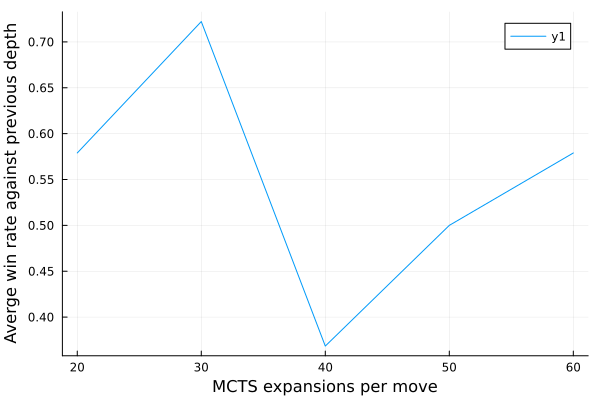

In [13]:
plot(20:10:60, mcts_win_avgs .- 1)
xlabel!("MCTS expansions per move")
ylabel!("Averge win rate against previous depth")

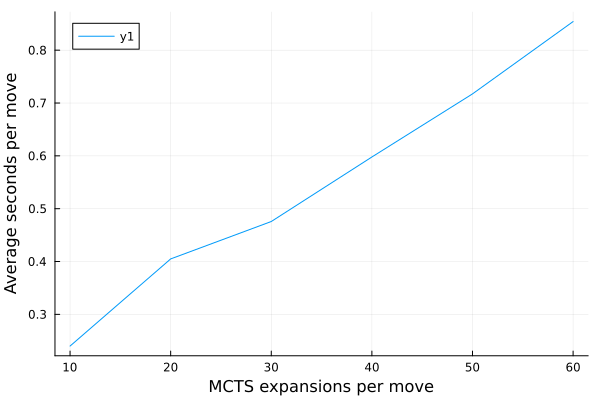

In [15]:
plot(10:10:60, mcts_times)
xlabel!("MCTS expansions per move")
ylabel!("Average seconds per move")

In [16]:
full_mcts_times, s_comparison, l_comparison = MCTS.bench_mcts(MCTS.max_mcts)

([0.16418330614107324 0.324235909344213 … 0.820526771594436 0.9085773295641608; 0.2590431391501395 0.510940052840047 … 1.1659627208552124 1.4046202369625171], [[1.368421052631579, 1.6666666666666667, 1.4736842105263157, 1.45, 1.5384615384615385], [1.5384615384615385, 1.4615384615384615, 1.4210526315789473, 1.5128205128205128, 1.5405405405405406]], [[1.6571428571428573], [1.631578947368421], [1.7297297297297298], [1.5128205128205128], [1.435897435897436], [1.525]])

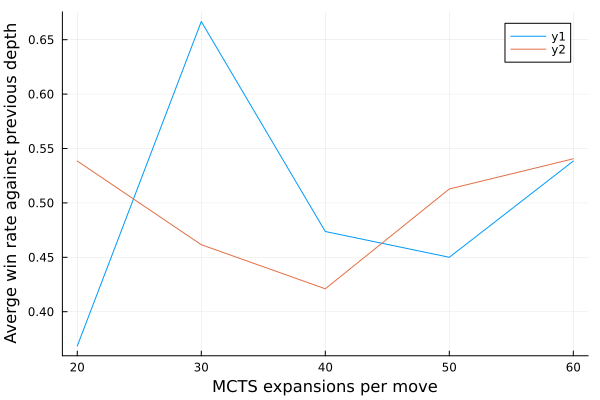

In [39]:
plot(20:10:60, VectorOfArray(s_comparison) .- 1)
xlabel!("MCTS expansions per move")
ylabel!("Averge win rate against previous depth")

In [17]:
@save "full_bench_mcts.bson" full_mcts_times s_comparison l_comparison

In [18]:
size(full_mcts_times)

(2, 6)

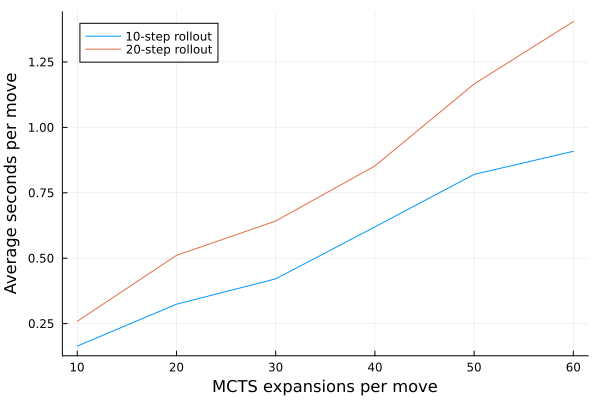

In [23]:
plot(10:10:60, full_mcts_times', label=["10-step rollout" "20-step rollout"])
xlabel!("MCTS expansions per move")
ylabel!("Average seconds per move")

In [21]:
classic_mcts_times, classic_s_comparison, classic_l_comparison = MCTS.bench_mcts(MCTS.classic_mcts)

([0.19589760065959183 0.3977961893785099 … 0.966615563924939 1.2025144255196052; 0.35380703335702807 0.6821288093148594 … 1.5755822351433404 1.9769370612189947], [[1.225, 1.55, 1.275, 1.425, 1.5], [1.375, 1.375, 1.45, 1.475, 1.475]], [[1.3], [1.425], [1.45], [1.4], [1.475], [1.325]])

In [22]:
@save "classic_bench_mcts.bson" classic_mcts_times classic_s_comparison classic_l_comparison

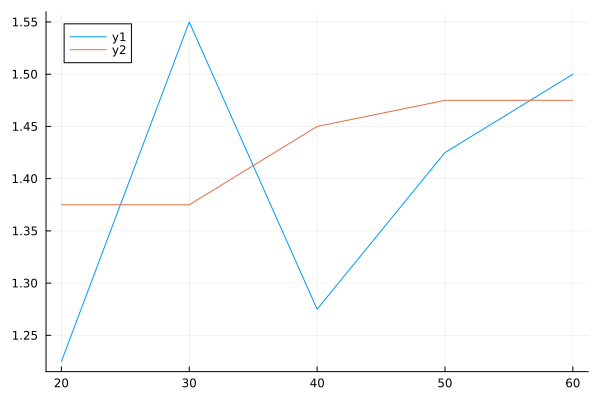

In [38]:
plot(20:10:60, VectorOfArray(classic_s_comparison))

In [40]:
MCTS.mcts_match() # 30 vs 50

1.6

In [47]:
MCTS.both_mcts_match()

1.55

In [46]:
matchup = MCTS.winners_circle()

LoadError: TaskFailedException

[91m    nested task error: [39mKeyError: key MCTS.State(1, MCTS.PlayerState[MCTS.PlayerState(Int8[4, 1], Int8[6 5 … 3 2; 1 1 … 1 1]), MCTS.PlayerState(Int8[4, 8], Int8[6 5 … 2 2; 8 8 … 6 8])]) not found
    Stacktrace:
      [1] [0m[1mgetindex[22m
    [90m    @ [39m[90m./[39m[90m[4mdict.jl:498[24m[39m[90m [inlined][39m
      [2] [0m[1m(::MCTS.MaxMCTS{Tuple{MCTS.Greedy, MCTS.Greedy}})[22m[0m[1m([22m[90mst[39m::[0mMCTS.State[0m[1m)[22m
    [90m    @ [39m[35mMCTS[39m [90m~/MCTS/src/[39m[90m[4mclassic.jl:138[24m[39m
      [3] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m~/.julia/packages/Unrolled/nMVH3/src/[39m[90m[4mUnrolled.jl:47[24m[39m[90m [inlined][39m
      [4] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m~/MCTS/src/[39m[90m[4mrules.jl:205[24m[39m[90m [inlined][39m
      [5] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m~/.julia/packages/Unrolled/nMVH3/src/[39m[90m[4mUnrolled.jl:127[24m[39m[90m [inlined][39m
      [6] [0m[1msimulate_[22m[0m[1m([22m[90mst[39m::[0mMCTS.State, [90mplayers[39m::[0mTuple[90m{MCTS.Rand, MCTS.MaxMCTS{Tuple{MCTS.Greedy, MCTS.Greedy}}}[39m, [90mplayer_ixs[39m::[0mTuple[90m{Pair{Int64, Int64}, Pair{Int64, Int64}}[39m, [90msteps[39m::[0mInt64, [90mlog[39m::[0mBool, [90mtrack[39m::[0mBool[0m[1m)[22m
    [90m    @ [39m[35mMCTS[39m [90m~/.julia/packages/Unrolled/nMVH3/src/[39m[90m[4mUnrolled.jl:127[24m[39m
      [7] [0m[1m#simulate#7[22m
    [90m    @ [39m[90m~/MCTS/src/[39m[90m[4mrules.jl:199[24m[39m[90m [inlined][39m
      [8] [0m[1msimulate[22m
    [90m    @ [39m[90m~/MCTS/src/[39m[90m[4mrules.jl:197[24m[39m[90m [inlined][39m
      [9] [0m[1m#259[22m
    [90m    @ [39m[90m~/MCTS/src/[39m[90m[4mMCTS.jl:140[24m[39m[90m [inlined][39m
     [10] [0m[1m(::ThreadTools.var"#8#10"{Tuple{Int64}, MCTS.var"#259#264"{MCTS.MaxMCTS{Tuple{MCTS.Greedy, MCTS.Greedy}}, MCTS.Rand}})[22m[0m[1m([22m[0m[1m)[22m
    [90m    @ [39m[36mThreadTools[39m [90m./[39m[90m[4mthreadingconstructs.jl:258[24m[39m